In [3]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [4]:
df = pd.read_csv(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT\testset.csv\testset.csv')

In [5]:
df.head(5)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:

# Nettoyer les colonnes
df.columns = df.columns.str.strip()

# Afficher la taille et un aperçu du dataset
print(f"Nombre de lignes : {len(df)}")
print(df.head())




Nombre de lignes : 100990
     datetime_utc _conds  _dewptm  _fog  _hail  _heatindexm  _hum  _precipm  \
0  19961101-11:00  Smoke      9.0     0      0          NaN  27.0       NaN   
1  19961101-12:00  Smoke     10.0     0      0          NaN  32.0       NaN   
2  19961101-13:00  Smoke     11.0     0      0          NaN  44.0       NaN   
3  19961101-14:00  Smoke     10.0     0      0          NaN  41.0       NaN   
4  19961101-16:00  Smoke     11.0     0      0          NaN  47.0       NaN   

   _pressurem  _rain  _snow  _tempm  _thunder  _tornado  _vism  _wdird _wdire  \
0      1010.0      0      0    30.0         0         0    5.0   280.0   West   
1     -9999.0      0      0    28.0         0         0    NaN     0.0  North   
2     -9999.0      0      0    24.0         0         0    NaN     0.0  North   
3      1010.0      0      0    24.0         0         0    2.0     0.0  North   
4      1011.0      0      0    23.0         0         0    1.2     0.0  North   

   _wgustm  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1   _conds        100918 non-null  object 
 2   _dewptm       100369 non-null  float64
 3   _fog          100990 non-null  int64  
 4   _hail         100990 non-null  int64  
 5   _heatindexm   29155 non-null   float64
 6   _hum          100233 non-null  float64
 7   _precipm      0 non-null       float64
 8   _pressurem    100758 non-null  float64
 9   _rain         100990 non-null  int64  
 10  _snow         100990 non-null  int64  
 11  _tempm        100317 non-null  float64
 12  _thunder      100990 non-null  int64  
 13  _tornado      100990 non-null  int64  
 14  _vism         96562 non-null   float64
 15  _wdird        86235 non-null   float64
 16  _wdire        86235 non-null   object 
 17  _wgustm       1072 non-null    float64
 18  _win

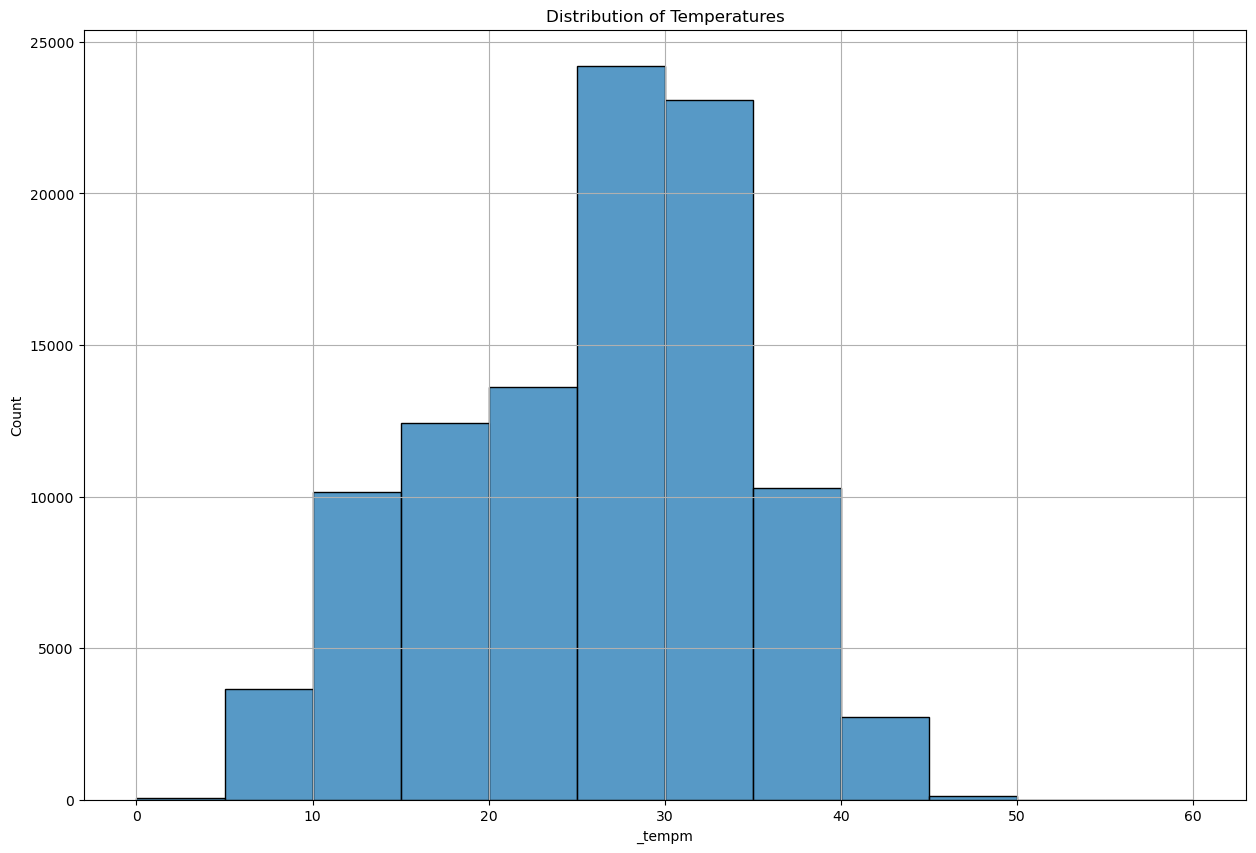

In [8]:
# plot to see the temperature varience
plt.figure(figsize=(15, 10))
sns.histplot(df['_tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [9]:

# set data index as datetime column
df.index = pd.to_datetime(df.datetime_utc)


In [10]:
# filter the columns by only the required_columns
required_cols = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']
df = df[required_cols]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [11]:
# check number of nan values in dataframe
# check number of nan values in dataframe
df.isnull().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [14]:

# fill the nan values by upper row value
df.ffill(inplace=True)  # Modifie directement df sans réassignation
df.tail()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0,0,0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0,0,0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0,0,0
2017-04-24 15:00:00,15.0,0,0,27.0,0,0,32.0,0,0
2017-04-24 18:00:00,15.0,0,0,30.0,0,0,30.0,0,0


In [18]:
df.isnull().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [25]:
df_final = df.resample('D').mean()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [27]:
df_final.shape

(7480, 9)

In [33]:

df_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_hum        141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [35]:

df_final = df_final.ffill()
df_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df_final.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][6]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (5976, 10, 9)
Train Y shape: (5976,)
Test X shape: (1494, 10, 9)
Test Y shape: (1494,)


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# 1️⃣ Normalisation des données
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

# 2️⃣ Définition des paramètres
sequence_length = 10  # Nombre de pas de temps
target_column = 6  # Index de la colonne '_tempm'

# 3️⃣ Séparation en Train/Test
train_data, test_data = train_test_split(scaled_data, test_size=0.2, shuffle=False)

# 4️⃣ Génération des séquences avec TimeSeriesGenerator
train_generator = TimeseriesGenerator(train_data, train_data[:, target_column], 
                                      length=sequence_length, batch_size=1)

test_generator = TimeseriesGenerator(test_data, test_data[:, target_column], 
                                     length=sequence_length, batch_size=1)

# 5️⃣ Affichage des formes des jeux de données
print(f"Nombre de séquences d'entraînement : {len(train_generator)}")
print(f"Nombre de séquences de test : {len(test_generator)}")

# Vérification d'une séquence
sample_x, sample_y = train_generator[0]  # Premier batch
print(f"Sample X shape: {sample_x.shape}")  # (1, 10, num_features)
print(f"Sample Y shape: {sample_y.shape}")  # (1,)


Nombre de séquences d'entraînement : 5974
Nombre de séquences de test : 1486
Sample X shape: (1, 10, 9)
Sample Y shape: (1,)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Définition du modèle avec Input()
model = Sequential([
    Input(shape=(train_x.shape[1], train_x.shape[2])),  # Définition de l'entrée
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    
    LSTM(units=64, return_sequences=True),
    Dropout(0.2),
    
    LSTM(units=32, return_sequences=False),
    Dropout(0.2),
    
    Dense(units=1)  # Couche de sortie
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Affichage du résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,513 (517.63 KB)

 Trainable params: 132,513 (517.63 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 📌 Définition des callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# 📌 Correction du format du fichier (Keras impose .keras)
checkpoint_path = r"C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT.keras"

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,  # Correction ici
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False  # Sauvegarde tout le modèle
)

# 📌 Entraînement du modèle
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0492 - val_loss: 0.0046
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - val_loss: 0.0046
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0090 - val_loss: 0.0040
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083 - val_loss: 0.0043
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - val_loss: 0.0038
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0082 - val_loss: 0.0037
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0070 - val_loss: 0.0036
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [53]:

# Evaluate the best model on the test set
best_model = tf.keras.models.load_model(r"C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT.keras")
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Test Loss: 0.0021558364387601614


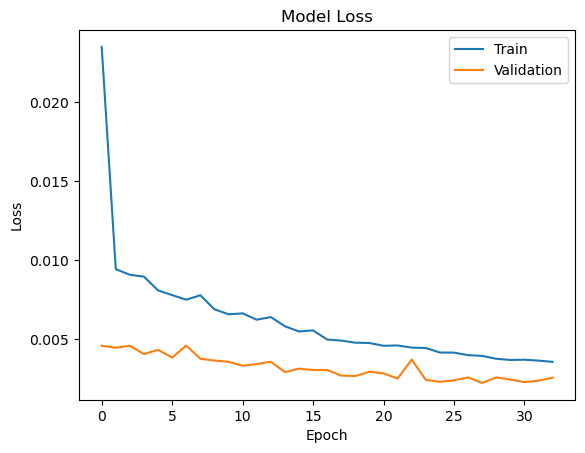

In [55]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Absolute Error (MAE): 0.03611651485764072
Mean Squared Error (MSE): 0.002155836330921687
Root Mean Squared Error (RMSE): 0.04643098459995962


In [59]:

# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


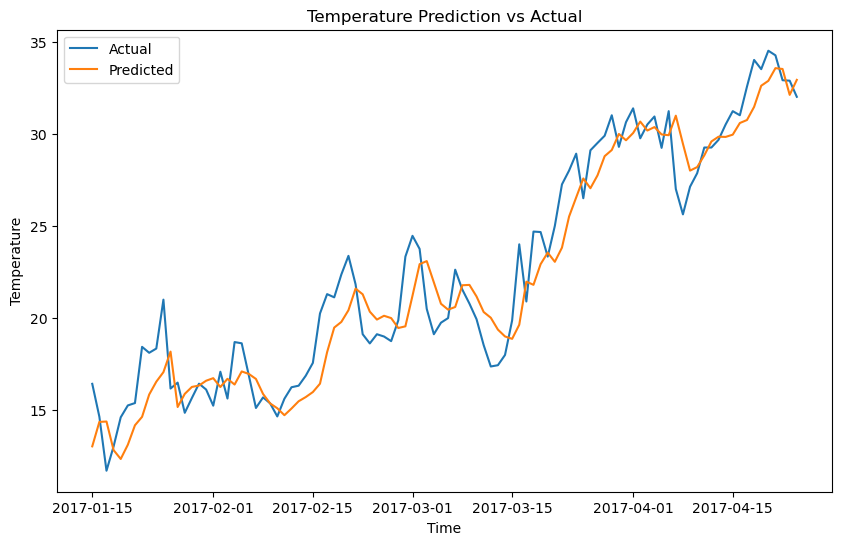

In [61]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# test 2

In [66]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_final)

In [68]:
data_scaled

array([[0.44471154, 0.        , 0.        , ..., 0.46387643, 0.        ,
        0.        ],
       [0.40784486, 0.        , 0.        , ..., 0.48044345, 0.        ,
        0.        ],
       [0.45615292, 0.        , 0.        , ..., 0.44849278, 0.        ,
        0.        ],
       ...,
       [0.71116864, 0.        , 0.        , ..., 0.76397608, 0.2       ,
        0.        ],
       [0.55022652, 0.        , 0.        , ..., 0.76326607, 0.        ,
        0.        ],
       [0.5420541 , 0.        , 0.        , ..., 0.73841555, 0.        ,
        0.        ]])

In [102]:
features=data_scaled
target=data_scaled[:,6]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [112]:
y_train

array([0.46387643, 0.48044345, 0.44849278, ..., 0.49498185, 0.46860987,
       0.65794718])

In [114]:
y_test

array([0.50647733, 0.54671151, 0.60706278, ..., 0.76397608, 0.76326607,
       0.73841555])

In [134]:
win_length=10
batch_size=1
num_features=9
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [136]:
train_generator[0]

(array([[[0.44471154, 0.        , 0.        , 0.47392924, 0.        ,
          0.        , 0.46387643, 0.        , 0.        ],
         [0.40784486, 0.        , 0.        , 0.42597765, 0.        ,
          0.        , 0.48044345, 0.        , 0.        ],
         [0.45615292, 0.        , 0.        , 0.50791434, 0.        ,
          0.        , 0.44849278, 0.        , 0.        ],
         [0.40064103, 0.        , 0.        , 0.41961515, 0.        ,
          0.        , 0.47492111, 0.        , 0.        ],
         [0.33894231, 0.        , 0.        , 0.21117318, 0.        ,
          0.        , 0.61913303, 0.        , 0.        ],
         [0.36525749, 0.        , 0.        , 0.41759777, 0.        ,
          0.        , 0.45263453, 0.        , 0.        ],
         [0.3773345 , 0.        , 0.        , 0.41899441, 0.        ,
          0.        , 0.44730942, 0.        , 0.        ],
         [0.33538277, 0.        , 0.        , 0.3943203 , 0.        ,
          0.        , 0.426

In [138]:
test_generator[0]

(array([[[0.59217825, 0.        , 0.        , 0.53631285, 0.        ,
          0.        , 0.50647733, 0.        , 0.        ],
         [0.5616679 , 0.        , 0.        , 0.44413408, 0.        ,
          0.        , 0.54671151, 0.        , 0.        ],
         [0.62268861, 0.        , 0.        , 0.44273743, 0.        ,
          0.        , 0.60706278, 0.        , 0.        ],
         [0.6265024 , 0.        , 0.        , 0.4273743 , 0.        ,
          0.        , 0.59641256, 0.        , 0.        ],
         [0.48539201, 0.        , 0.        , 0.39106145, 0.        ,
          0.        , 0.49701046, 0.        , 0.        ],
         [0.5028265 , 0.        , 0.        , 0.38068635, 0.        ,
          0.        , 0.51526799, 0.        , 0.        ],
         [0.55404031, 0.        , 0.        , 0.57541899, 0.        ,
          0.        , 0.42600897, 0.        , 0.        ],
         [0.58999894, 0.        , 0.        , 0.58339984, 0.        ,
          0.        , 0.466

In [140]:
# 5️⃣ Affichage des formes des jeux de données
print(f"Nombre de séquences d'entraînement : {len(train_generator)}")
print(f"Nombre de séquences de test : {len(test_generator)}")

Nombre de séquences d'entraînement : 5974
Nombre de séquences de test : 1486


In [142]:
train_x.shape[1]

10

In [144]:
train_x.shape[2]

9

In [132]:
print(f"Sample X shape: {sample_x.shape}")  # (1, 10, num_features)

Sample X shape: (1, 10, 9)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [146]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))  

model.add(tf.keras.layers.LSTM(64, return_sequences=False, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))  

model.add(tf.keras.layers.Dense(1))  # Pas d'activation ici si tes prédictions peuvent être négatives


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [150]:
# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Affichage du résumé du modèle
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,129 (469.25 KB)

 Trainable params: 120,129 (469.25 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 📌 Définition des callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# 📌 Correction du format du fichier (Keras impose .keras)
checkpoint_path = r"C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT.keras"

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,  # Correction ici
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False  # Sauvegarde tout le modèle
)

# 📌 Entraînement du modèle
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0542 - val_loss: 0.0040
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0087 - val_loss: 0.0038
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0078 - val_loss: 0.0036
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - val_loss: 0.0036
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - val_loss: 0.0039
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0067 - val_loss: 0.0031
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0059 - val_loss: 0.0033
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0057 - val_loss: 0.0028
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

In [158]:
from tensorflow.keras.models import load_model

# Charger le modèle depuis le fichier sauvegardé
model_best = load_model(r"C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT.keras")

# Vérifier la structure du modèle chargé
model_best.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,389 (1.37 MB)

 Trainable params: 120,129 (469.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 240,260 (938.52 KB)

In [160]:
# Évaluer le modèle sur les données de test
test_loss = model_best.evaluate(test_x, test_y)

print(f"Erreur MSE sur le test set : {test_loss:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Erreur MSE sur le test set : 0.0021


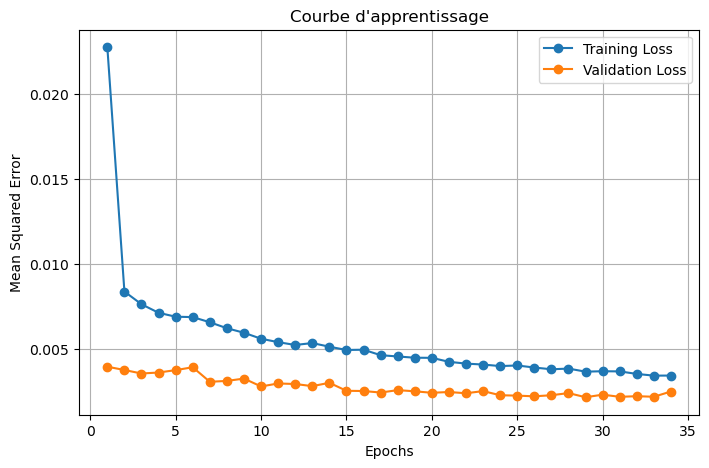

In [162]:
import matplotlib.pyplot as plt

# Récupérer l'historique
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Courbe d'apprentissage")
plt.legend()
plt.grid()
plt.show()


In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Mean Absolute Error (MAE): 0.03604834731324952
Mean Squared Error (MSE): 0.0021363714559717415
Root Mean Squared Error (RMSE): 0.04622089847646561


In [166]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


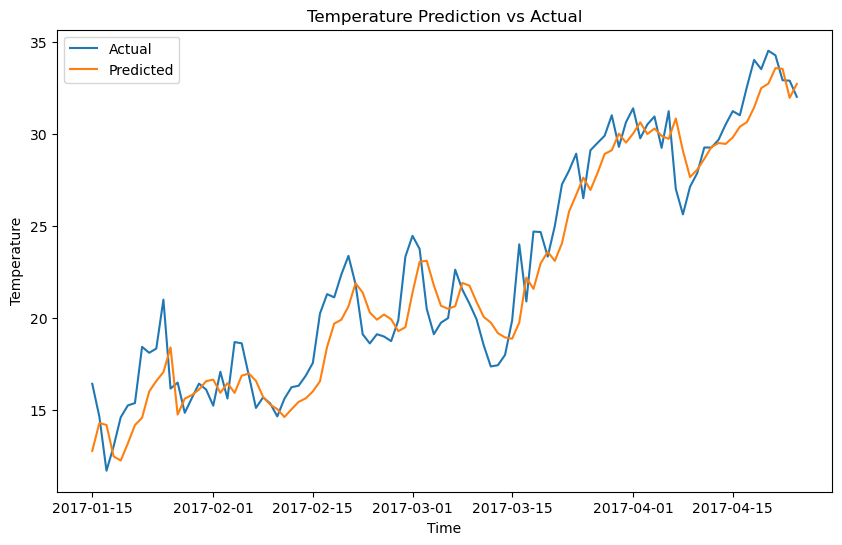

In [168]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [176]:
test_y

array([0.60706278, 0.59641256, 0.49701046, ..., 0.76397608, 0.76326607,
       0.73841555])

In [174]:
t == test_y.reshape(-1, 1)

NameError: name 't' is not defined